# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress, pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(study_results, mouse_metadata, on = "Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice.
Mice_Count = combined_df["Mouse ID"].unique()
Mice_Total = len(Mice_Count)
Mice_Total

249

In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df[combined_df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicates_mouse_id= duplicates["Mouse ID"].unique()
duplicates_mouse_id

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame.
Clean_Count = clean_df["Mouse ID"].unique()
Clean_Total = len(Clean_Count)
Clean_Total

249

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
data_index = clean_df.set_index(["Drug Regimen"]).groupby("Drug Regimen")
mean = data_index["Tumor Volume (mm3)"].mean()
median = data_index["Tumor Volume (mm3)"].median()
variance = data_index["Tumor Volume (mm3)"].var()
sd = data_index["Tumor Volume (mm3)"].std()
sem = data_index["Tumor Volume (mm3)"].sem()

tumor_index = pd.DataFrame({"Mean Tumor Volume": mean,
                            "Median Tumor Volume": median,
                            "Tumor Volume Variance": variance,
                            "Tumor Volume Std Dev.": sd, 
                            "Tumor Volume Std Err.": sem})
tumor_index

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_aggregation = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
drug_tumor_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [33]:
Drug_Timepoint = clean_df.groupby(["Drug Regimen"]).count()["Timepoint"]

<Axes: title={'center': 'Drugs and Timepoints'}, xlabel='Drug Regimen', ylabel='# of Timepoints'>

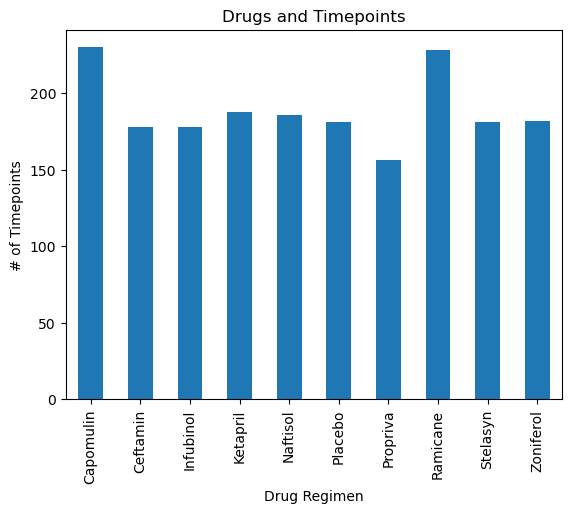

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
Drug_Timepoint = clean_df.groupby(["Drug Regimen"]).count()["Timepoint"]
Drug_Timepoint.plot(kind = "bar", title = "Drugs and Timepoints", xlabel = "Drug Regimen", ylabel = "# of Timepoints")

<function matplotlib.pyplot.show(close=None, block=None)>

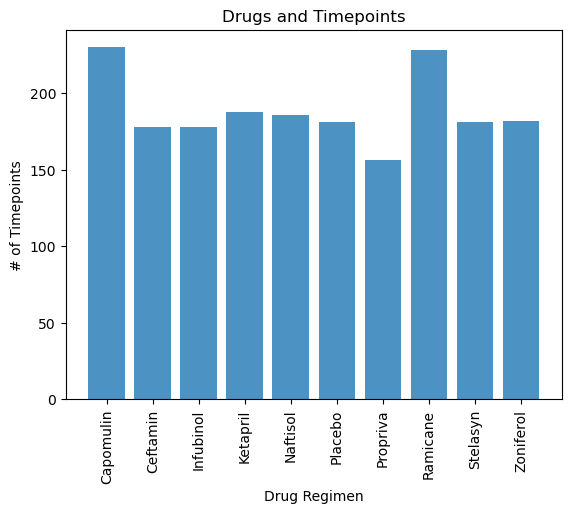

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = Drug_Timepoint.index.values
timepoint = Drug_Timepoint.values
plt.bar(drug_regimen, timepoint, alpha = .8, align = "center")
plt.title("Drugs and Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints")
plt.xticks(rotation="vertical")
plt.show

<Axes: ylabel='count'>

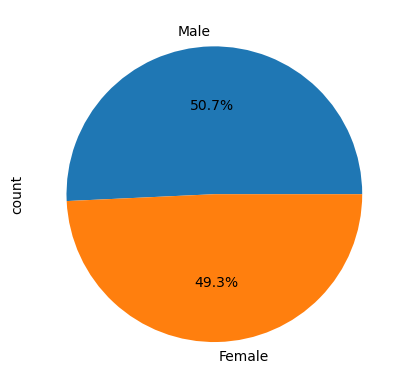

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
FM_comparison= clean_df["Sex"].value_counts()
FM_comparison.plot.pie(autopct= "%1.1f%%")


Text(0.5, 1.0, 'Male Vs Female Pop.')

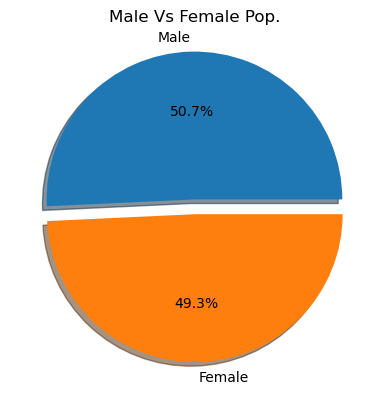

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
explode = (0.1, 0)
plt.pie(FM_comparison, autopct= "%1.1f%%", labels = labels, shadow = True, explode = explode)
plt.title("Male Vs Female Pop.")


## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

Cap_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Cap_vol = pd.DataFrame(Capomulin_last)
Cap_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Cap_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [39]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

        lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    # add subset 

    
    # Determine outliers using upper and lower bounds


AttributeError: module 'pandas' has no attribute 'clean_df'

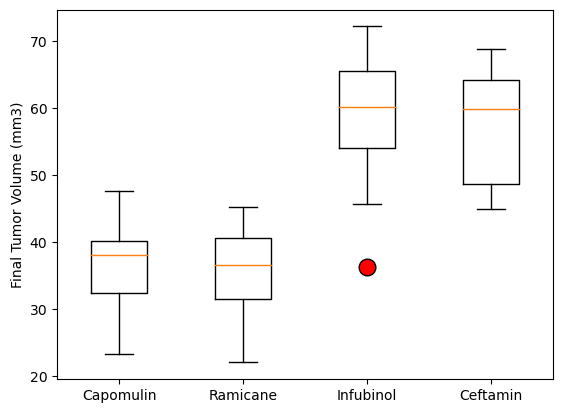

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

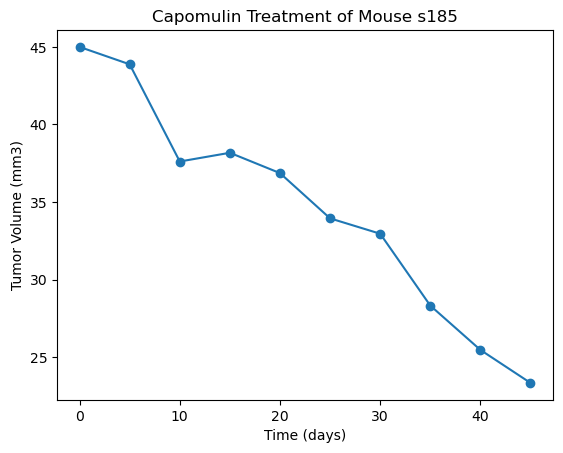

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_time = combined_df.loc[combined_df['Mouse ID'] == 's185']
plt.plot(tumor_time ['Timepoint'], tumor_time ['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
plt.show()

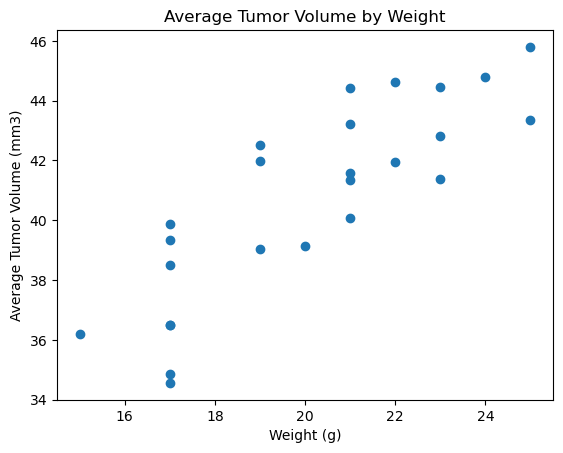

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_df

plt.scatter(final_avg_vol_df['Weight (g)'],final_avg_vol_df['avg_tumor_vol'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The r-value between Weight (g) and avg_tumor_vol is 0.84


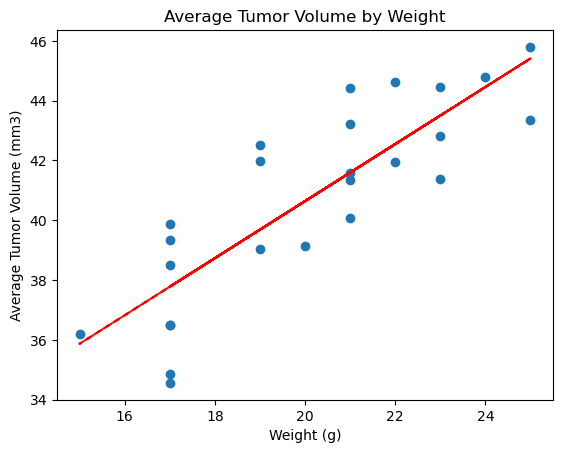

In [61]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")
    
linear_reg(final_df['Weight (g)'], final_df['avg_tumor_vol'],(10, -10))

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()